# Basic usage of `stoflo`: Solving the Lotka-Volterra Equations

Here we solve the Lotka-Volterra equations, which are:

$$\frac{dx}{dt}=ax - bxy$$

$$\frac{dy}{dt}=cxy - dy$$

where our state variables $x$ and $y$ are represented as stocks, $a$, $b$, $c$ and $d$ are parameters, and we have the following flows:

$$x_{in}=ax$$

$$x_{out}=bxy$$

$$y_{in}=cxy$$

$$y_{out}=dy$$

This is quite unstable, so since we are using an explicit Euler solution we need to use a small timestep. We use $dt=0.1$, so that states are reported every 0.1 time units, but we also use $niter=100$, so that 100 sub-steps are taken between each reported state.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from stoflo import model

In [2]:
# Create a model:
l=model()

In [3]:
# Add time grid information:
# Note that a small calculation timestep is needed for a stable solution, so we set niter=100
l.addTime(dt=0.1,tMax=100,niter=100)

In [4]:
# Add stock(s):
l.addStock('x',40.)
l.addStock('y',9.)

In [5]:
# Add flow(s):
def xin(t,stocks,pars):
    return pars['a']*stocks['x']
l.addFlow('xin',xin,into='x')

def xout(t,stocks,pars):
    return pars['b']*stocks['x']*stocks['y']
l.addFlow('xout',xout,outfrom='x')

def yin(t,stocks,pars):
    return pars['c']*stocks['x']*stocks['y']
l.addFlow('yin',yin,into='y')

def yout(t,stocks,pars):
    return pars['d']*stocks['y']
l.addFlow('yout',yout,outfrom='y')

In [6]:
# Add driver(s): None

In [7]:
# Add parameters
pars={}
pars['a']=0.5
pars['b']=0.02
pars['c']=0.01
pars['d']=0.4
l.addPars(pars)

In [8]:
# Run model
l.runEuler()

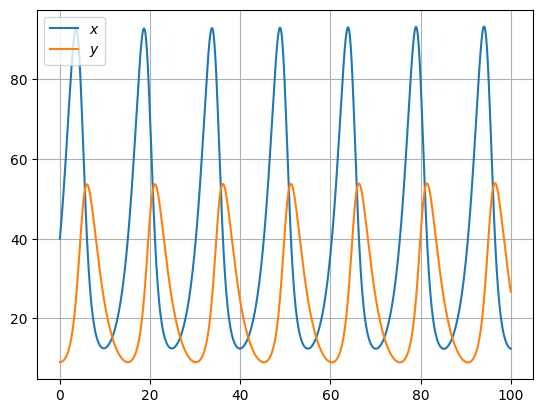

In [9]:
# Plot reservoir water balance
pl.plot(l.t,l.stocks['x'],label='$x$')
pl.plot(l.t,l.stocks['y'],label='$y$')
pl.grid()
pl.legend()
pl.show()